In [7]:
import sys
sys.path.append("..")
from plots import *
import numpy as np
import pandas as pd
from datetime import timedelta

# load stock data
data = pd.read_csv('stock_data.csv', header=[
                   0, 1], index_col=0, parse_dates=True)
daily_returns = (data['Close'] / data['Close'].shift(1) - 1)[1:]

TEST_YEARS = 0
TRAIN_END_DATE = data.index.max() - timedelta(days=TEST_YEARS * 365)

train = daily_returns[(daily_returns.index < TRAIN_END_DATE)].fillna(0)
test = daily_returns[(daily_returns.index >= TRAIN_END_DATE)].fillna(0)

compare_files = [
    '../.data/3000_331iter.json',
    # '../.data/3000_355iter.json',
    # '../.data/3000_362iter.json',
    # '../.data/3000_opt_374iter.json',
    # '../.data/3000_opt_416iter.json',
    '../.data/3000_opt_468iter.json',
    # '../.data/3000_opt2_387iter.json',
    '../.data/3000_opt2_411iter.json',
    # '../.data/3000_opt2_456iter.json',
]

stats_lst, solutions_lst = zip(*[read_log(file) for file in compare_files])

labels = ['nsga-ii', 'select_opt', 'select_opt+dyn_mut+dyn_pop']
args = {
    'solutions_lst': solutions_lst,
    'train': train,
    'labels': labels
}

traces = read_traces()

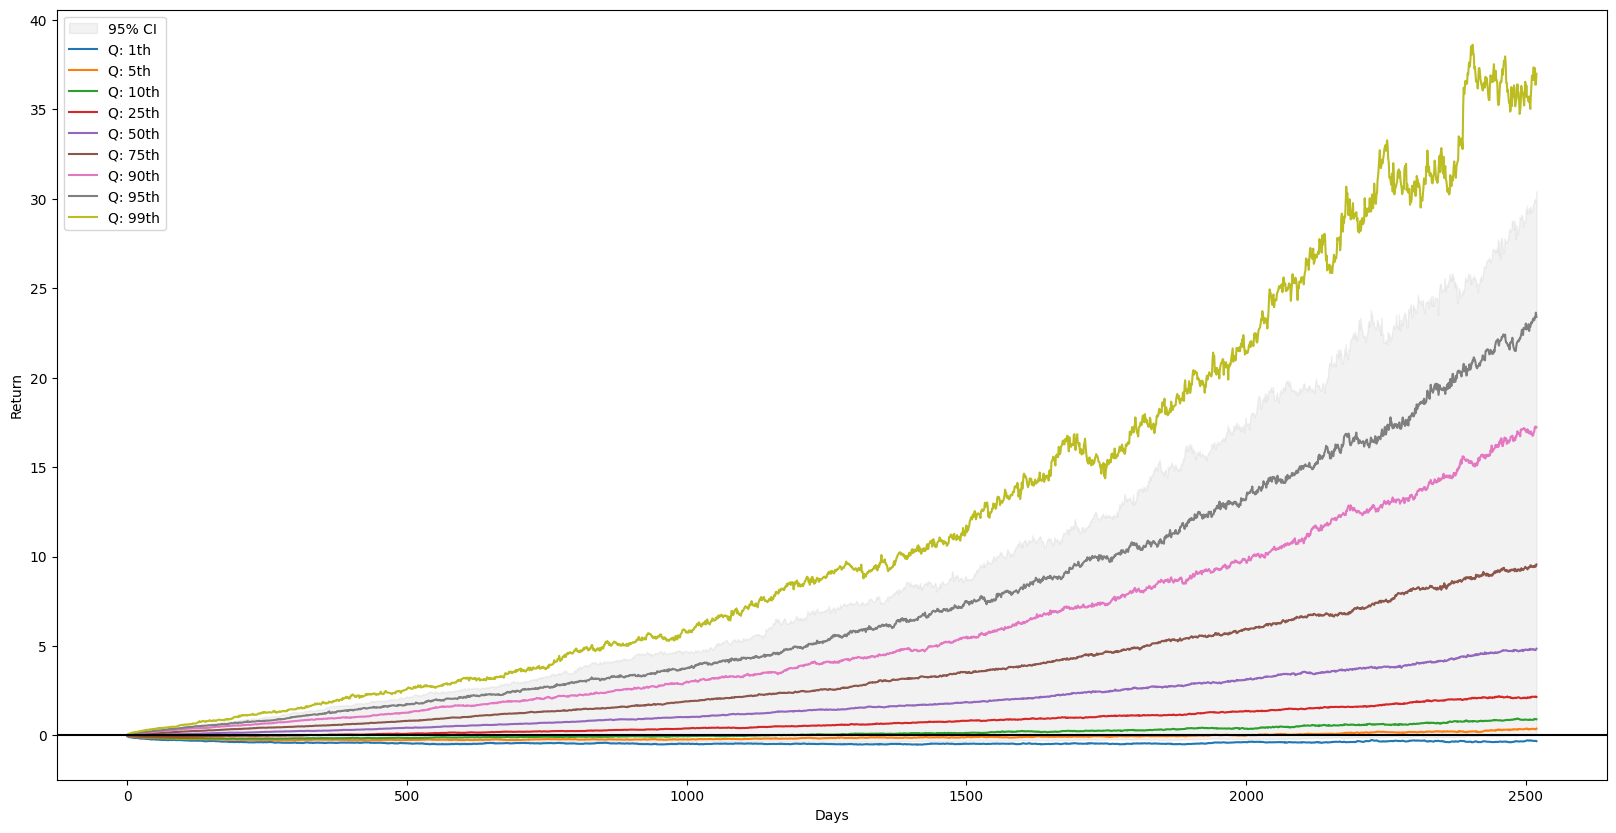

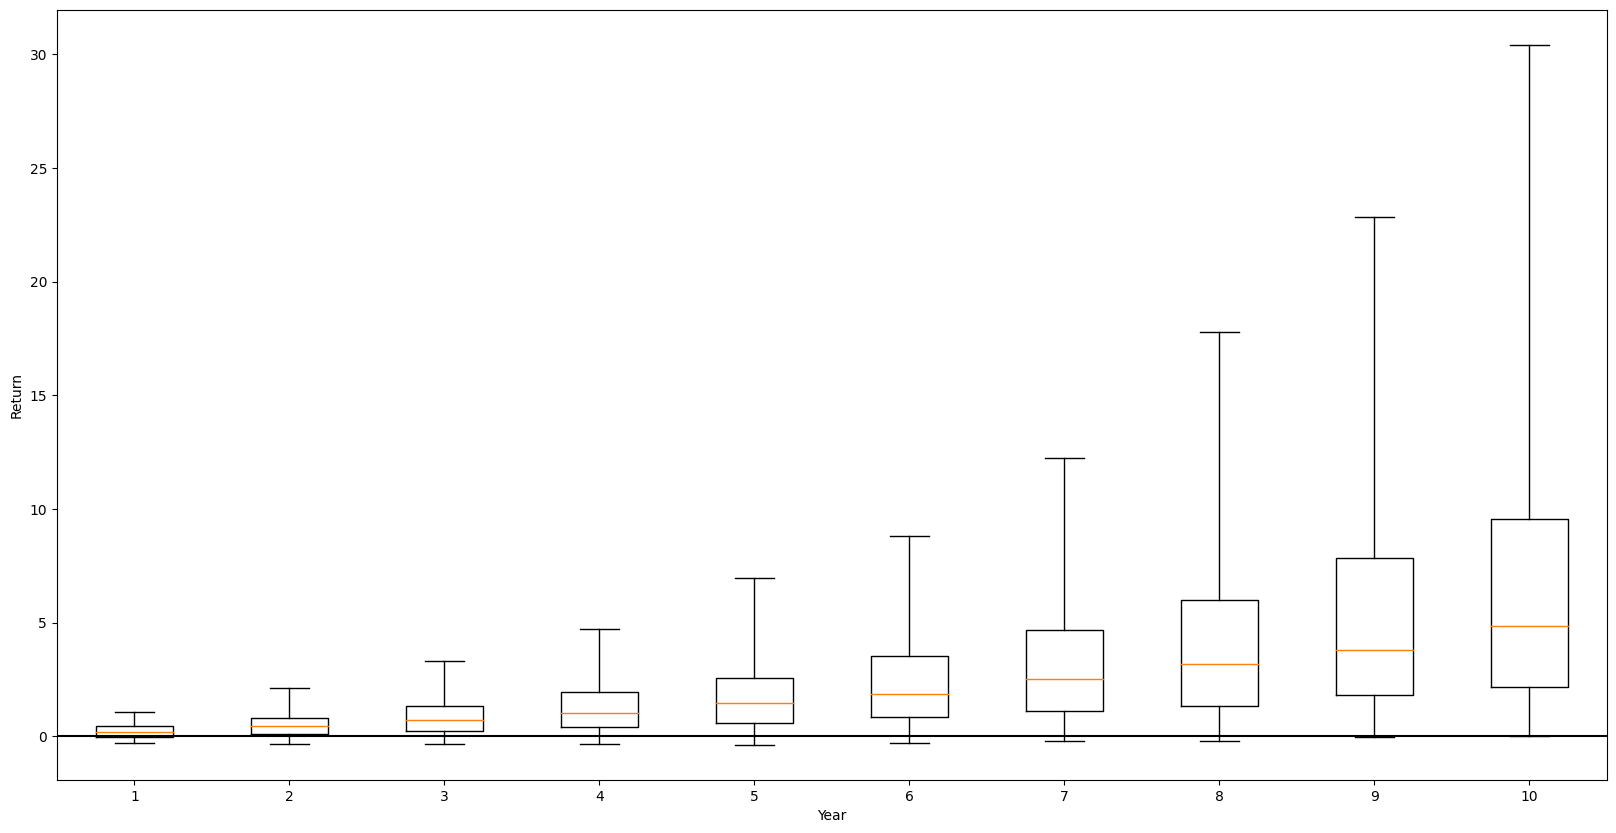

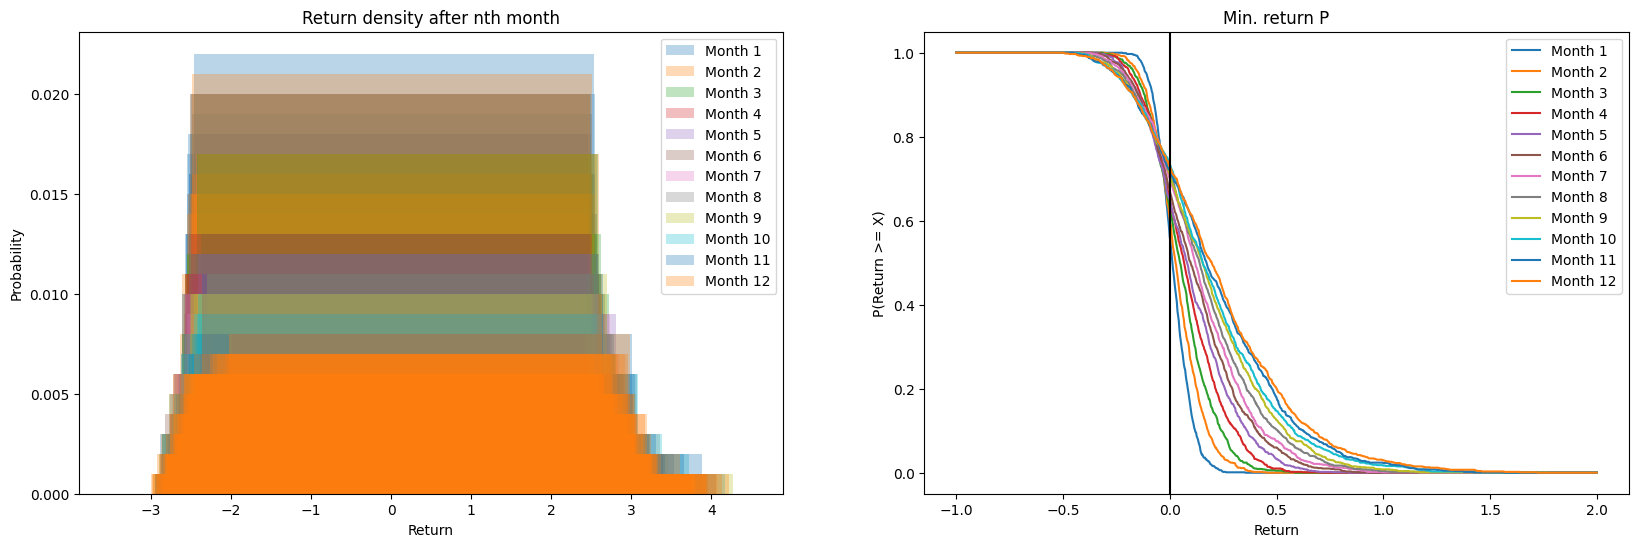

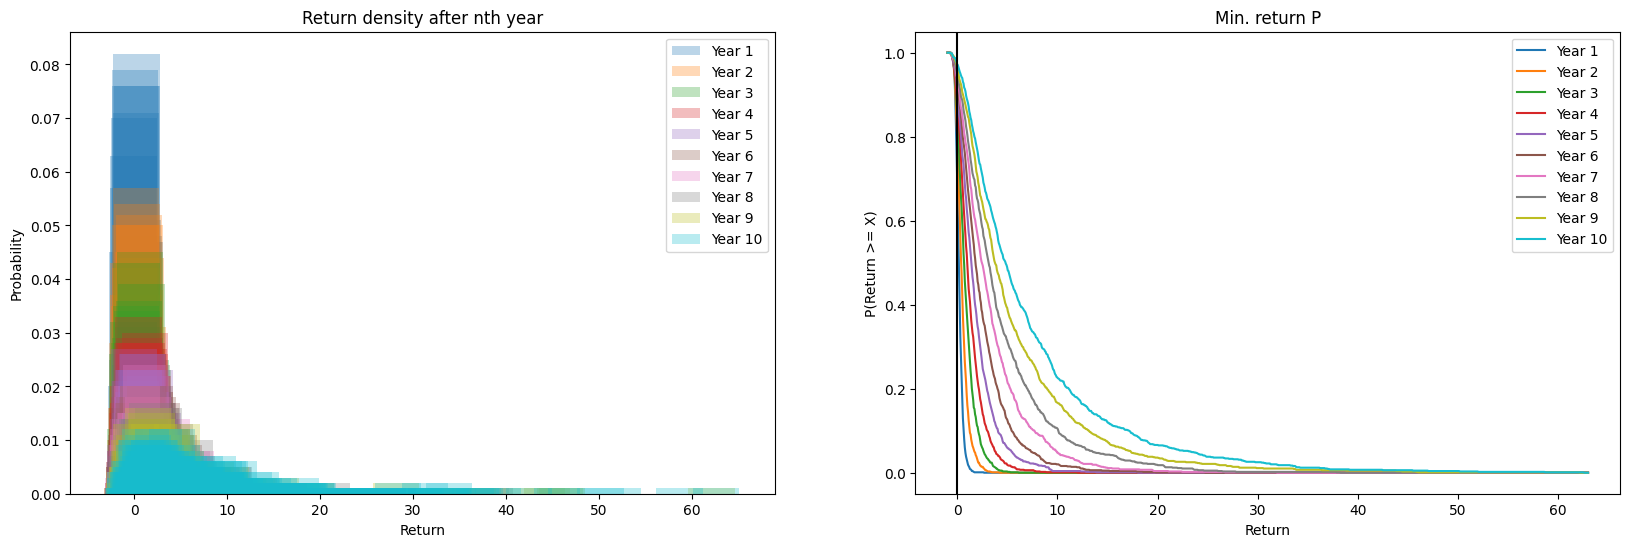

,< 0,> 0,>= 1,>= 2,>= 3,>= 4,>= 5,>= 6,>= 7,>= 8,>= 9,>= 10
Year,,,,,,,,,,,,
1,27.0,73.0,3.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.2,81.8,17.8,3.6,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0
3,13.6,86.4,37.5,11.5,3.5,1.0,0.3,0.1,0.0,0.0,0.0,0.0
4,10.7,89.3,51.6,23.2,10.2,4.4,2.0,0.8,0.6,0.3,0.1,0.1
5,8.2,91.8,62.2,36.1,19.9,10.6,6.0,3.6,2.5,1.9,1.3,0.4
6,7.2,92.8,70.1,47.3,31.7,20.5,12.8,8.3,5.8,4.3,2.3,2.0
7,5.7,94.3,76.7,57.5,43.4,30.9,22.3,16.3,12.0,9.4,7.3,4.8
8,4.8,95.2,81.0,65.3,51.9,38.9,31.6,24.9,20.1,15.8,12.2,10.6
9,3.1,96.9,86.0,71.1,59.7,48.3,39.3,33.0,28.1,24.3,20.0,16.8


In [8]:
from optfolio.report import *
mcmc_cum_returns = plot_traces(np.array(traces[labels[2]]))
returns_table(mcmc_cum_returns)